In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iris

In [2]:
iris = sns.load_dataset('iris')

## a
붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width),
꽃받침길이(petal_length), 꽃받침폭(petal_width)의 평균, 표준편차 등
기초통계량(describe())을 구하시오.

In [32]:
iris.head()
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

In [33]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [34]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
for species in iris.species.unique():
    print(species, " =============================== ")
    print(iris[iris.species == species].describe())
    print()
     

setosa  =============================== 
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor  =============================== 
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.

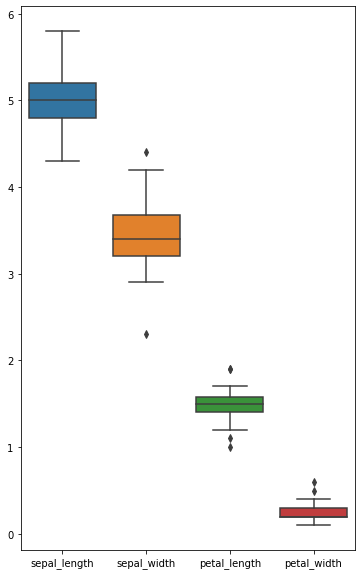

In [36]:
plt.figure(figsize=(6, 10))
sns.boxplot(data = iris[iris.species == 'setosa'])
plt.show()

## b
3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다.
즉,
* Q1 - 1.5 * (Q3 - Q1) 보다 작은 데이터
* Q3 + 1.5 * (Q3 - Q1) 보다 큰 데이터

이 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.

In [37]:
s = iris[iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25) #판다스를 활용함
q3 = np.percentile(s.values, 75)  #넘파이 활용

In [38]:
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [39]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 *iqr
s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [40]:
s.isna().sum()

2

In [41]:
lower_limit, upper_limit

(2.4875, 4.3875)

In [42]:
s.mean(), s.std()

(3.43125, 0.32034306743094004)

In [43]:
def get_new_stat(s):
    q1 = s.quantile(0.25)     #판다스 방법
    q3 = np.percentile(s.values, 75) #넘파이 방법
    iqr = q3 - q1
    lower_limit = q1 - 1.5 *iqr
    upper_limit = q3 + 1.5 *iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std()

In [44]:
get_new_stat(iris[iris.species == 'setosa']['sepal_width'])

(3.43125, 0.32034306743094004)

In [45]:
# code refactoring 
def get_new_stat(s):
    q1, q3 = s.quantile(0.25), np.percentile(s.values, 75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 *iqr
    upper_limit = q3 + 1.5 *iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.isna().sum(), s.mean(), s.std()

In [46]:
# for setosa, ver, vir #종류
#     for s.l, s.w ,p.l, p.w #컬럼
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species,  feature,":", new_mean, new_std)

setosa sepal_length : 5.006 0.35248968721345136
setosa sepal_width : 3.43125 0.32034306743094004
setosa petal_length : 1.4608695652173913 0.12906201931985212
setosa petal_width : 0.2333333333333333 0.08588298157855662
versicolor sepal_length : 5.936 0.5161711470638634
versicolor sepal_width : 2.7700000000000005 0.3137983233784114
versicolor petal_length : 4.285714285714285 0.43779751788545657
versicolor petal_width : 1.3259999999999998 0.19775268000454405
virginica sepal_length : 6.6224489795918355 0.593459246748267
virginica sepal_width : 2.9553191489361703 0.2602745295112517
virginica petal_length : 5.5520000000000005 0.5518946956639834
virginica petal_width : 2.0260000000000002 0.2746500556366674


In [47]:
# 결과를 데이터 프레임으로 변경
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature,
             'outlier갯수':outlier, 'mean':new_mean, 'std':new_std}
        line.append(d)
df = pd.DataFrame(line)
df

,species,feature,outlier갯수,mean,std
0,setosa,sepal_length,0,5.006000,0.352490
1,setosa,sepal_width,2,3.431250,0.320343
2,setosa,petal_length,4,1.460870,0.129062
3,setosa,petal_width,2,0.233333,0.085883
4,versicolor,sepal_length,0,5.936000,0.516171
5,versicolor,sepal_width,0,2.770000,0.313798
6,versicolor,petal_length,1,4.285714,0.437798
7,versicolor,petal_width,0,1.326000,0.197753
8,virginica,sepal_length,1,6.622449,0.593459
9,virginica,sepal_width,3,2.955319,0.260275


In [48]:
df.set_index(['species', 'feature'], inplace=True)

In [49]:
df.loc['versicolor']

,outlier갯수,mean,std
feature,,,
sepal_length,0,5.936000,0.516171
sepal_width,0,2.770000,0.313798
petal_length,1,4.285714,0.437798
petal_width,0,1.326000,0.197753


In [50]:
#setosa의 sepal_width 데이터 프레임 형태로 
df.loc[[('setosa', 'sepal_width')]]

,,outlier갯수,mean,std
species,feature,,,
setosa,sepal_width,2,3.43125,0.320343


# Titanic


In [3]:
titanic = sns.load_dataset('titanic')

## a
타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만드시오. 
category1 카테고리는 다음과 같이 정의됨

1) 20살이 넘으면 성별을 그대로 사용한다.
2) 20살 미만이면 성별에 관계없이 “child”라고 한다.


In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic['category1'] =  titanic.apply(lambda x : "child" if x.age < 20 else "male" if x.sex=='male' else 'female', axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


## b
 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값
이 되도록 titanic 데이터프레임을 고치시오.


In [6]:
mean_age = titanic.age.mean(axis=0)
titanic.age.fillna(mean_age, inplace=True)

## c
성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오.

In [7]:
sex_group = titanic.groupby('sex')['survived']
sex_group.mean()
#titanic.pivot_table('survived', 'embark_town')

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [8]:
class_group = titanic.groupby('class')['survived']
class_group.mean()
titanic.pivot_table(index = 'survived', columns ='class')

adult_male                            age                        \
class         First    Second     Third      First     Second      Third   
survived                                                                   
0          0.962500  0.938144  0.755376  40.896074  33.266947  27.417500   
1          0.308824  0.091954  0.319328  34.784615  26.076166  23.232689   

             alone                           fare  ...                parch  \
class        First    Second     Third      First  ...      Third     First   
survived                                           ...                        
0         0.637500  0.701031  0.685484  64.684007  ...  13.669364  0.300000   
1         0.426471  0.413793  0.579832  95.608029  ...  13.694887  0.389706   

                             pclass                  sibsp                      
class       Second     Third  First Second Third     First    Second     Third  
survived                                                                        
0         0.144330  0.384409      1      2     3  0.287500  0.319588  0.672043  
1         0.643678  0.420168      1      2     3  0.492647  0.494253  0.436975  

[2 rows x 21 columns]

In [9]:
embark_town_group = titanic.groupby('embark_town')['survived']
embark_town_group.mean()
#titanic.pivot_table('survived', 'embark_town')

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

## d
타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹으로 나누고, 각 그룹별 생존율을 구하시오.
* bins = [1, 20, 30, 50, 70, 100]
* labels = ["미성년자", "청년", "중년", "장년", "노년"]


In [10]:
bins = [0, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic["연령대"] = pd.cut(titanic.age, bins, labels=labels) 

titanic_age = pd.DataFrame(titanic.연령대.value_counts(), columns=["연령대"]) 
titanic_age["생존율"] = titanic.groupby('연령대')['survived'].mean()

In [11]:
titanic_age

,연령대,생존율
청년,407,0.334152
중년,241,0.423237
미성년자,179,0.458101
장년,59,0.355932
노년,5,0.200000


## e
qcut 명령으로 세 개의 나이 그룹을 만들고, 나이 그룹별 남녀 성비와 생존율을 구하시오.

In [12]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,연령대
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,중년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,청년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,청년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,청년


In [13]:
titanic['age-group'] = pd.qcut(titanic.age, 3, labels=['젊은이', '중간', '늙은이'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,연령대,age-group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,청년,젊은이
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,중년,늙은이
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,청년,중간
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,중년,늙은이
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,중년,늙은이
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,청년,중간
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,미성년자,젊은이
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,청년,중간
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,청년,중간


In [14]:
age_group_survived = titanic.groupby('age-group')['survived']
age_group_survived.mean()

age-group
젊은이    0.411960
중간     0.335526
늙은이    0.405594
Name: survived, dtype: float64

In [15]:
titanic['sex_category'] = titanic.apply(lambda x : 1 if x.sex=='male' else 0, axis=1)
titanic['sex_category_f'] = titanic.apply(lambda x : 1 if x.sex=='female' else 0, axis=1)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,연령대,age-group,sex_category,sex_category_f
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,청년,젊은이,1,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,중년,늙은이,0,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,청년,중간,0,1
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,중년,늙은이,0,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,중년,늙은이,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,청년,중간,1,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,미성년자,젊은이,0,1
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,청년,중간,0,1
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,청년,중간,1,0


In [16]:
# 나이 그룹별 남자비율
age_group_survived = titanic.groupby('age-group')['sex_category']
age_group_survived.mean()

age-group
젊은이    0.594684
중간     0.680921
늙은이    0.667832
Name: sex_category, dtype: float64

In [17]:
# 나이 그룹별 여자비율
age_group_survived_f = titanic.groupby('age-group')['sex_category_f']
age_group_survived_f.mean()

age-group
젊은이    0.405316
중간     0.319079
늙은이    0.332168
Name: sex_category_f, dtype: float64

#mpg

In [18]:
mpg = sns.load_dataset('mpg')

##3 - A


In [19]:
df = mpg[['displacement','horsepower']]
df['hp_per_cc'] = df['displacement']/df['horsepower']
df.round(3)

<ipython-input-19-c81205201d91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp_per_cc'] = df['displacement']/df['horsepower']


,displacement,horsepower,hp_per_cc
0,307.0,130.0,2.362
1,350.0,165.0,2.121
2,318.0,150.0,2.120
3,304.0,150.0,2.027
4,302.0,140.0,2.157
...,...,...,...
393,140.0,86.0,1.628
394,97.0,52.0,1.865
395,135.0,84.0,1.607
396,120.0,79.0,1.519


In [20]:
#3. Mile per gallon a.
#mpg['hp_per_cc'] = mpg.horsepower / mpg.displacemnet

##3-B

In [21]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()
df1=mpg['name']

In [22]:
df_list=[]
for i in range(len(df1)):
  if len(df1[i].split())==6:
    a = df1[i].split()
    df_list.append(a[0])
  if len(df1[i].split())==5:
    a = df1[i].split()
    df_list.append(a[0])
  if len(df1[i].split())==4:
    a = df1[i].split()
    df_list.append(a[0])
  if len(df1[i].split())== 3:
    a = df1[i].split()
    df_list.append(a[0])
  if len(df1[i].split())==2:
    a = df1[i].split()
    df_list.append(a[0])
  if len(df1[i].split())==1:
    a = df1[i].split()
    df_list.append(a[0])

In [23]:
df_list1=[]
for i in range(len(df1)):
  if len(df1[i].split())==6:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)
  if len(df1[i].split())==5:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)
  if len(df1[i].split())==4:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)
  if len(df1[i].split())== 3:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)
  if len(df1[i].split())==2:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)
  if len(df1[i].split())==1:
    a = df1[i].split()
    b = listToString(a[1:])
    df_list1.append(b)

In [24]:
mpg['manufacturer']=df_list
mpg['model']=df_list1
ans=mpg.drop(columns = ['name'])
ans

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


In [25]:
# manufacture와 model 컬럼
#mpg['manufacture'] = mpg.name.apply(lambda x : x.split()[0])
#mpg['model'] = mpg.name.apply(lambda x : " ".join(x.split()[1:]))
#mpg.drop(columns=['name'], inplace=True)

##3-C

In [26]:
mpg.groupby('cylinders')['mpg'].mean()
#mpg.pivot_table('mpg', 'cylinders')

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

##3-D

In [27]:
#mpg.pivot_table('hp_per_cc','origin')

##3-E

In [28]:
fin = ans[['mpg','manufacturer']]
mpg_model = pd.pivot_table(ans, index = 'manufacturer',values = 'model', aggfunc='count').drop_duplicates ()
a = mpg_model[mpg_model.values >5].index
new_ = []
no = []
for i in range(len(fin)):
  if (fin['manufacturer'][i] in a) & (fin['manufacturer'][i] not in no):
    new_.append(fin['mpg'][i])
    no.append(fin['manufacturer'][i])
answer = pd.DataFrame(new_,a)
a = answer[0]
a.sort_values(ascending =False).head(5)

manufacturer
plymouth    30.0
ford        27.0
honda       26.0
fiat        24.0
mazda       24.0
Name: 0, dtype: float64

In [29]:
#mpg.manufacture.value_counts() >=5
#s =mpg.manufacture.value_counts()
#big = s[s > 5].index.tolist()
#mpg 데이터에서 big에 속하는 것만 나오도록 필터링
#mpg[mpg.manufacture.isin(big)]
#big_mpg = mpg[mpg.manufacture.isin(big)]
#big_mpg.pivot_table('mpg','manufacture').sort_values(by='mpg',ascending ="False")

In [30]:
#new_mpg = mpg.groupby('manufacture').filter(lambda x : x.manufacture.count() >=5)
#new_mpg.pivot_table('mpg', 'manufacture').sort_values(by='mpg', ascending =False).head(5)